In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import src.util as util
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# 1.Load Config

In [86]:
config_data = util.load_config()

# 2. Load Dataset

In [87]:
def load_dataset(config_data: dict) -> pd.DataFrame:
    # Load every set of data
    x_train = util.pickle_load(config_data["train_set_path"][0])
    y_train = util.pickle_load(config_data["train_set_path"][1])

    x_valid = util.pickle_load(config_data["valid_set_path"][0])
    y_valid = util.pickle_load(config_data["valid_set_path"][1])

    x_test = util.pickle_load(config_data["test_set_path"][0])
    y_test = util.pickle_load(config_data["test_set_path"][1])

    # Concatenate x and y each set
    train_set = pd.concat([x_train, y_train], axis = 1)
    valid_set = pd.concat([x_valid, y_valid], axis = 1)
    test_set = pd.concat([x_test, y_test], axis = 1)

    # Return 3 set of data
    return train_set, valid_set, test_set

In [88]:
train_set, valid_set, test_set = load_dataset(config_data)

# 3. Encoding Categorical Data

In [89]:
def cat_ohe_fit(config_data):
    for cat in config_data['predictors_categorical']:
        ohe_obj = OneHotEncoder(sparse = False,handle_unknown = 'ignore')
        # Fit ohe
        ohe_obj.fit(np.array(config_data["range_"+cat]).reshape(-1, 1))
        # Save ohe object
        util.pickle_dump(ohe_obj, config_data["ohe_"+cat+"_path"])

In [90]:
cat_ohe_fit(config_data)

/root/miniconda3/envs/mlprocess_asistensi/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/root/miniconda3/envs/mlprocess_asistensi/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/root/miniconda3/envs/mlprocess_asistensi/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/root/miniconda3/envs/mlprocess_asistensi/lib/python3.8/site-packages/sklearn/preprocessing/_encoder

In [91]:
def ohe_transform(set_data: pd.DataFrame, tranformed_column: str, ohe_path: str) -> pd.DataFrame:
    # Create copy of set data
    set_data = set_data.copy()

    # Load ohe stasiun
    ohe_obj = util.pickle_load(ohe_path)

    # Transform variable of set data, resulting array
    features = ohe_obj.transform(np.array(set_data[tranformed_column].to_list()).reshape(-1, 1))

    # Convert to dataframe
    column_name = [tranformed_column+"_"+s for s in ohe_obj.categories_[0]]
    features = pd.DataFrame(features.tolist(), columns = list(column_name))

    # Set index by original set data index
    features.set_index(set_data.index, inplace = True)

    # Concatenate new features with original set data
    set_data = pd.concat([features, set_data], axis = 1)

    # Drop stasiun column
    set_data.drop(columns = tranformed_column, inplace = True)

    # Convert columns type to string
    new_col = [str(col_name) for col_name in set_data.columns.to_list()]
    set_data.columns = new_col

    # Return new feature engineered set data
    return set_data

In [92]:
def cat_ohe_transform(set_data, config_data):
    set_data = set_data.copy()
    for cat in config_data['predictors_categorical']:
        set_data = ohe_transform(set_data,cat,config_data["ohe_"+cat+"_path"])
    return set_data

In [93]:
train_set = cat_ohe_transform(train_set,config_data)
train_set

,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_No,Self_Employed_Unknown,Self_Employed_Yes,Education_Graduate,Education_Not Graduate,Dependents_0,Dependents_1,...,Married_Yes,Gender_Female,Gender_Male,Gender_Unknown,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
197,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1907,2365.0,120.0,360.0,1.0,Y
175,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,3497,1964.0,116.0,360.0,1.0,Y
526,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,3775,0.0,110.0,360.0,1.0,Y
149,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,4860,830.0,125.0,360.0,1.0,Y
507,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,3583,0.0,96.0,360.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1299,1086.0,17.0,120.0,1.0,Y
297,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,4666,0.0,135.0,360.0,1.0,Y
395,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,3276,484.0,135.0,360.0,1.0,Y
310,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,2917,0.0,84.0,360.0,1.0,Y


In [94]:
valid_set = cat_ohe_transform(valid_set,config_data)
valid_set

,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_No,Self_Employed_Unknown,Self_Employed_Yes,Education_Graduate,Education_Not Graduate,Dependents_0,Dependents_1,...,Married_Yes,Gender_Female,Gender_Male,Gender_Unknown,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
216,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,150,1800.0,135.0,360.0,1.0,N
48,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,2645,3440.0,120.0,360.0,0.0,N
539,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,6417,0.0,157.0,180.0,1.0,Y
54,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,11500,0.0,286.0,360.0,0.0,N
239,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,3315,0.0,96.0,360.0,1.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,2479,3013.0,188.0,360.0,1.0,Y
324,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,15000,0.0,300.0,360.0,1.0,Y
346,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,3523,3230.0,152.0,360.0,0.0,N
86,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,3333,2000.0,99.0,360.0,1.0,Y


In [95]:
test_set = cat_ohe_transform(test_set,config_data)
test_set

,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_No,Self_Employed_Unknown,Self_Employed_Yes,Education_Graduate,Education_Not Graduate,Dependents_0,Dependents_1,...,Married_Yes,Gender_Female,Gender_Male,Gender_Unknown,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
609,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,Y
343,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,3173,0.0,74.0,360.0,1.0,Y
429,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,2717,0.0,60.0,180.0,1.0,Y
150,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,6277,0.0,118.0,360.0,0.0,N
152,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,9166,0.0,244.0,360.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,5516,11300.0,495.0,360.0,0.0,N
228,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,4758,0.0,158.0,480.0,1.0,Y
94,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,3620,0.0,25.0,120.0,1.0,Y
532,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,3588,0.0,110.0,360.0,0.0,N


# 4. Balancing Data

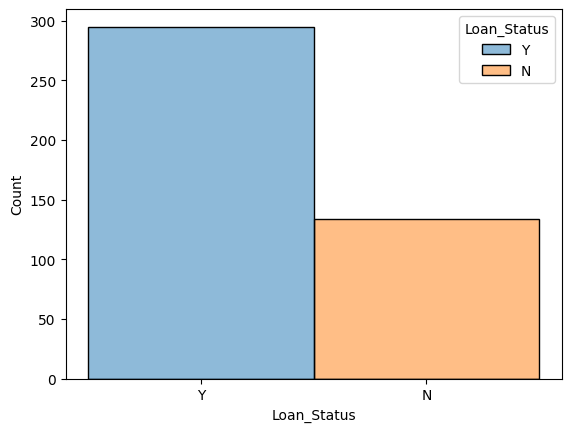

In [96]:
sns.histplot(data = train_set, x = "Loan_Status", hue = "Loan_Status")
plt.show()

### Balancing Data with SMOTE

In [97]:
def sm_fit_resample(set_data: pd.DataFrame) -> pd.DataFrame:
    # Create copy of set data
    set_data = set_data.copy()

    # Create sampling object
    sm = SMOTE(random_state = 112)

    # Balancing set data
    x_sm, y_sm = sm.fit_resample(set_data.drop("Loan_Status", axis = 1), set_data["Loan_Status"])

    # Concatenate balanced data
    set_data_sm = pd.concat([x_sm, y_sm], axis = 1)

    # Return balanced data
    return set_data_sm

In [98]:
train_set_sm = sm_fit_resample(train_set)

<Axes: xlabel='Loan_Status', ylabel='Count'>

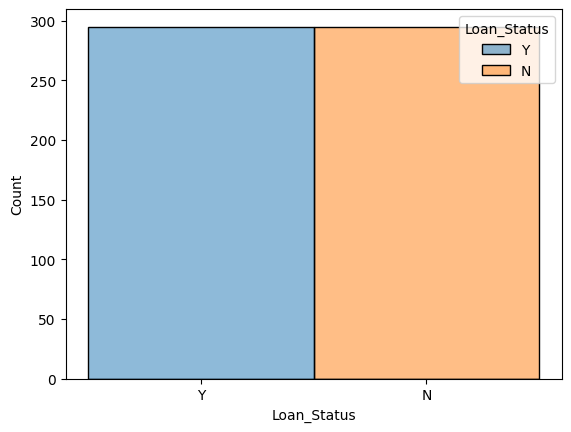

In [99]:
sns.histplot(train_set_sm, x = "Loan_Status", hue = "Loan_Status")

# 5. Label Encoder

In [100]:
def le_fit(data_tobe_fitted: dict, le_path: str) -> LabelEncoder:
    # Create le object
    le_encoder = LabelEncoder()

    # Fit le
    le_encoder.fit(data_tobe_fitted)

    # Save le object
    util.pickle_dump(le_encoder, le_path)

    # Return trained le
    return le_encoder

In [101]:
le_encoder = le_fit(config_data["label_categories"], config_data["le_path"])

In [102]:
def le_transform(label_data: pd.Series, config_data: dict) -> pd.Series:
    # Create copy of label_data
    label_data = label_data.copy()

    # Load le encoder
    le_encoder = util.pickle_load(config_data["le_path"])

    # If categories both label data and trained le matched
    if len(set(label_data.unique()) - set(le_encoder.classes_) | set(le_encoder.classes_) - set(label_data.unique())) == 0:
        # Transform label data
        label_data = le_encoder.transform(label_data)
    else:
        raise RuntimeError("Check category in label data and label encoder.")
    
    # Return transformed label data
    return label_data

In [103]:
train_set_sm.Loan_Status = le_transform(train_set_sm.Loan_Status, config_data)

In [104]:
valid_set.Loan_Status = le_transform(valid_set.Loan_Status, config_data)

In [105]:
test_set.Loan_Status = le_transform(test_set.Loan_Status, config_data)

In [106]:
x_train = {
    "SMOTE" : train_set_sm.drop(columns = "Loan_Status")
}

y_train = {
    "SMOTE" : train_set_sm.Loan_Status
}

In [109]:
util.pickle_dump(x_train, "data/processed/x_train_feng.pkl")
util.pickle_dump(y_train, "data/processed/y_train_feng.pkl")

util.pickle_dump(valid_set.drop(columns = "Loan_Status"), "data/processed/x_valid_feng.pkl")
util.pickle_dump(valid_set.Loan_Status, "data/processed/y_valid_feng.pkl")

util.pickle_dump(test_set.drop(columns = "Loan_Status"), "data/processed/x_test_feng.pkl")
util.pickle_dump(test_set.Loan_Status, "data/processed/y_test_feng.pkl")